In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from src.scripts.merge_cmu import clean_cmu
from src.scripts.category_analysis import *

In [2]:
# Install colorcet if not already installed
%pip install colorcet
import colorcet as cc

Note: you may need to restart the kernel to use updated packages.


## Load Dataset Merged CMU-IMDB

In [3]:
# Load the dataset CMU
cmu_movies = clean_cmu("MovieSummaries/movie.metadata.tsv")

# Load the dataset merge_imdb
df = pd.read_csv('data/merge_imdb.csv')
df.head()

,imdbID,isAdult,movie_name,movie_date,box_office,runtime,language,countries,genres,author_book,year_book,rating,numVotes
0,tt0000679,0,thefairylogueandradio-plays,1908,NaN,120.0,English Language,United States of America,"Silent film, Black-and-white",L. Frank Baum,1900,5.2,76
1,tt0002646,0,atlantis,1913,NaN,113.0,"English Language, Danish Language",Denmark,"Silent film, Drama, Indie, Black-and-white",Gerhart Hauptmann,1912,6.5,500
2,tt0003022,0,ivanhoe,1913,NaN,NaN,"Silent film, English Language",United States of America,"Swashbuckler films, Silent film, Drama, Adventure",Sir Walter Scott,1820,5.6,97
3,tt0004099,0,"hismajesty,thescarecrowofoz",1914,NaN,60.0,English Language,United States of America,"Silent film, Adventure, Children's/Family, Bla...",L. Frank Baum,1900,5.3,533
4,tt0004182,0,thejungle,1914,NaN,NaN,"Silent film, English Language",NaN,Silent film,Upton Sinclair,1906,6.8,70


## Basic dataset analysis

In [ ]:
# Display basic information about the dataframe
print(df.info())

In [ ]:
# Display summary statistics of the dataframe
print(df.describe())

In [ ]:
# Check for missing values
print(df.isnull().sum())

In [ ]:
# Display the column names
print(df.columns)

In [ ]:
# Display basic statistics for each column in the dataframe
print(df.describe(include='all'))

## Book-to-movie analysis by categories
We begin our analysis by exploring the types of books that are most frequently adapted into movies. We want to understand which literacy works resonate with filmakers and audiences. 


In [4]:
adaptation_category_counts = analysis_by_category(df)
cmu_category_counts = analysis_by_category(cmu_movies)

In [5]:
# Convert counts in percentage
adaptation_category_perc = adaptation_category_counts.apply(lambda x: (x/len(df) * 100))
cmu_category_perc = cmu_category_counts.apply(lambda x: (x/len(cmu_movies) *100))

In [7]:
# Convert in DataFrame and merge to compare
df_adaptation_category = pd.DataFrame(adaptation_category_perc, columns=['count'])
df_cmu_category = pd.DataFrame(cmu_category_perc, columns=['count'])

adaptation_vs_cmu_categories = pd.merge(df_adaptation_category, df_cmu_category, left_index=True, right_index=True)
adaptation_vs_cmu_categories.columns = ['Adaptation', 'Movie']

,Adaptation,Movie
category,,
Drama,80.515464,51.028248
Action & Adventure,78.659794,30.444942
Thrillers & Mysteries,47.061856,17.477153
Historical & Period,45.876289,9.876317
Comedy,27.010309,33.826354
Classic & Silent,26.391753,18.529257
Crime & Gangster,25.670103,12.991033
Romance & Relationship,21.546392,12.643594
Fantasy & Science Fiction,21.288660,7.943382


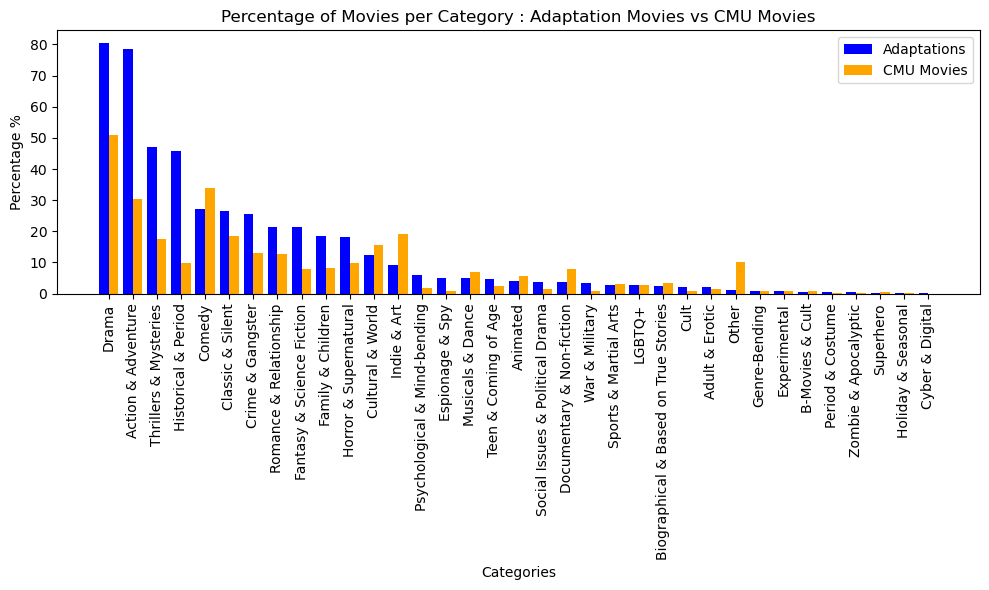

In [22]:
# Comparison Adaptation vs Movies Main Categories
index = range(len(adaptation_vs_cmu_categories))
bar_width = 0.4  # Width of the bars

plt.figure(figsize=(10, 6))

# Plot the adaptation dataset
plt.bar(index, adaptation_vs_cmu_categories['Adaptation'], width=bar_width, label='Adaptations', color='blue')

# Plot the movie dataset
plt.bar([i + bar_width for i in index], adaptation_vs_cmu_categories['Movie'], width=bar_width, label='CMU Movies', color='orange')

plt.xlabel('Categories')
plt.ylabel('Percentage %')
plt.title('Percentage of Movies per Category : Adaptation Movies vs CMU Movies')
plt.xticks([i + bar_width / 2 for i in index], adaptation_vs_cmu_categories.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


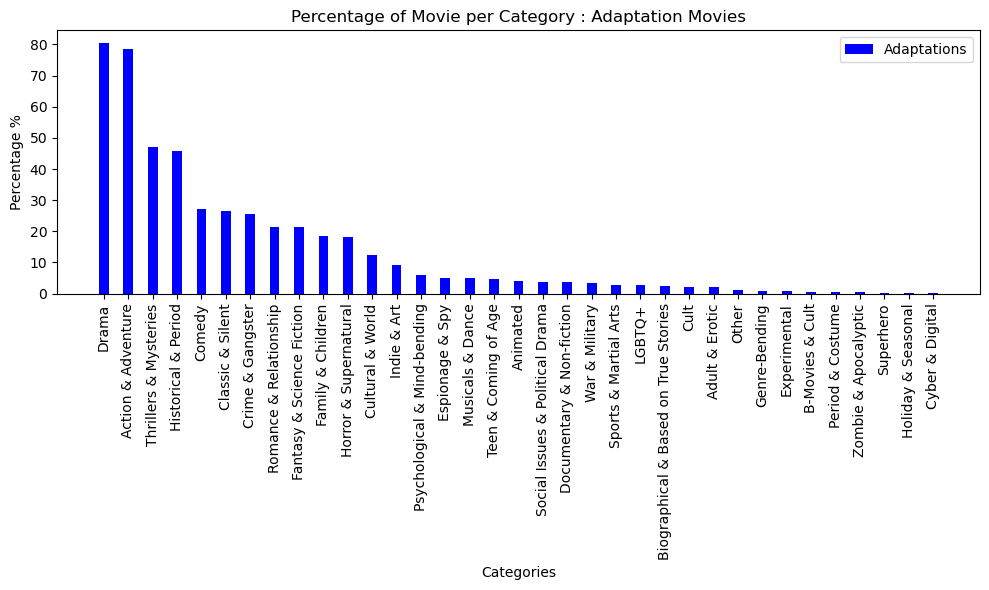

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(index, adaptation_vs_cmu_categories['Adaptation'], width=bar_width, label='Adaptations', color='blue')
plt.xlabel('Categories')
plt.ylabel('Percentage %')
plt.title('Percentage of Movies per Category : Adaptation Movies')
plt.xticks([i for i in index], adaptation_vs_cmu_categories.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

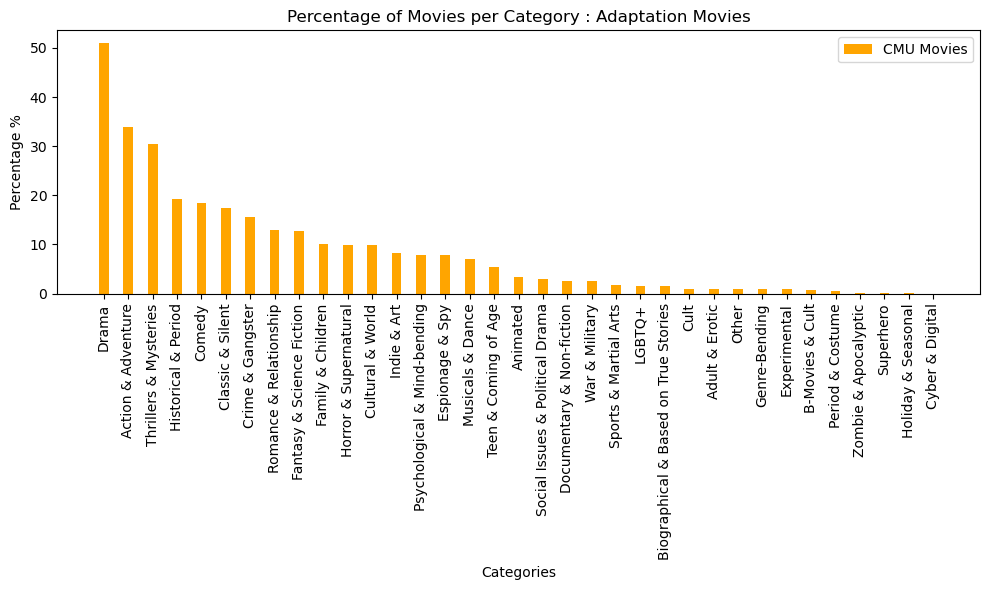

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(index, adaptation_vs_cmu_categories['Movie'].sort_values(ascending=False), width=bar_width, label='CMU Movies', color='orange')
plt.xlabel('Categories')
plt.ylabel('Percentage %')
plt.title('Percentage of Movies per Category : Adaptation Movies')
plt.xticks([i for i in index], adaptation_vs_cmu_categories.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### Average movie date for each category 
Which categories of book adaptations are gaining popularity over time?

In [ ]:
# Calculate the average movie date for each genre category
average_movie_date = df_genres_exploded.groupby('genres')['movie_date'].mean()

# Map genres to categories
average_movie_date_category = average_movie_date.reset_index()
average_movie_date_category['category'] = average_movie_date_category['genres'].map(lambda x: next((k for k, v in genre_categories.items() if x in v), 'Other'))

# Calculate the average movie date for each category
average_movie_date_category = average_movie_date_category.groupby('category')['movie_date'].mean()

# Sort the average movie date by descending order
average_movie_date_category = average_movie_date_category.sort_values(ascending=True)

# Plot the average movie date for each genre category
plt.figure(figsize=(8, 4))
average_movie_date_category.plot(kind='bar')
plt.title('Average Movie Date per Genre Category')
plt.xlabel('Genre Category')
plt.ylabel('Average Movie Date')
plt.xticks(rotation=90)
plt.ylim(average_movie_date_category.min() - 10, average_movie_date_category.max() + 10)
plt.show()

### Average box office for each genre category
Which genre category has attracted the most attention based on box office performance?\
Although this analysis is very simple, we are planning to conduct a more detailed analysis, taking into account the inflation for instance, to give a  more accurate picture of box office trends.

In [ ]:
# Calculate the average box office for each genre category
average_box_office = df_genres_exploded.dropna(subset=['box_office']).groupby('genres')['box_office'].mean()

# Map genres to categories
average_box_office_category = average_box_office.reset_index()
average_box_office_category['category'] = average_box_office_category['genres'].map(lambda x: next((k for k, v in genre_categories.items() if x in v), 'Other'))

# Calculate the average box office for each category
average_box_office_category = average_box_office_category.groupby('category')['box_office'].mean()

# Sort the average box office by descending order
average_box_office_category = average_box_office_category.sort_values(ascending=False)

# Plot the average box office for each genre category
plt.figure(figsize=(8, 4))
average_box_office_category.plot(kind='bar')
plt.title('Average Box Office per Genre Category')
plt.xlabel('Genre Category')
plt.ylabel('Average Box Office ($100 million)')
plt.xticks(rotation=90)
plt.ylim(0, average_box_office_category.max() + average_box_office_category.max()/10)
plt.show()

### Average runtime for each category 
Although this would need further investigation, analyzing the runtime of book-to-movie adaptations by category can provide insight into how different genres balance storytelling depth and audience expectations. It can highlight the compromises between narrative compression and fidelity to the source material.

In [ ]:
# Calculate the average runtime for each genre category
average_runtime = df_genres_exploded.dropna(subset=['runtime']).groupby('genres')['runtime'].mean()

# Map genres to categories
average_runtime_category = average_runtime.reset_index()
average_runtime_category['category'] = average_runtime_category['genres'].map(lambda x: next((k for k, v in genre_categories.items() if x in v), 'Other'))

# Calculate the average runtime for each category
average_runtime_category = average_runtime_category.groupby('category')['runtime'].mean()

# Sort the average runtime by descending order
average_runtime_category = average_runtime_category.sort_values(ascending=False)

# Plot the average runtime for each genre category
plt.figure(figsize=(8, 4))
average_runtime_category.plot(kind='bar')
plt.title('Average Runtime per Genre Category')
plt.xlabel('Genre Category')
plt.ylabel('Average Runtime (minutes)')
plt.xticks(rotation=90)
plt.ylim(average_runtime_category.min() - 10, average_runtime_category.max() + 10)
plt.show()

## Book-to-movie analysis by language and category
This analysis examines the distribution of movies across different genre categories and languages. This can provide insights into how genre preferences vary across linguistic contexts, potentially reflecting cultural influences. 

In [ ]:
# Separate the languages by each comma and explode the list into separate rows
df_genres_exploded['language'] = df_genres_exploded['language'].str.split(', ')
df_genres_exploded_languages_exploded = df_genres_exploded.explode('language')

# Clean the languages by removing the word "Language"
df_genres_exploded_languages_exploded['language'] = df_genres_exploded_languages_exploded['language'].str.replace(' Language', '')

In [ ]:
# Group by genre categories and languages, and count the number of movies in each combination
language_counts = df_genres_exploded_languages_exploded.groupby(['genres', 'language']).size().unstack()

# Get the top 10 most used languages
top_languages = language_counts.sum().sort_values(ascending=False).head(10).index

# Map genres to categories
language_counts['category'] = language_counts.index.map(lambda x: next((k for k, v in genre_categories.items() if x in v), 'Other'))

# Group by genre categories and languages, and count the number of movies in each combination
language_counts = language_counts.groupby('category').sum()

# Keep only the top 10 languages and group the rest into 'Other'
language_counts['Other'] = language_counts.drop(columns=top_languages).sum(axis=1)
language_counts = language_counts[top_languages.tolist() + ['Other']]

# Sort the genre categories by the total number of movies in descending order
language_counts = language_counts.loc[language_counts.sum(axis=1).sort_values(ascending=False).index]

# Plot the stacked bar chart
unique_languages = language_counts.columns
colors = sns.color_palette(cc.glasbey_category10, n_colors=len(unique_languages))  # Get a unique color for each language

language_counts[unique_languages].plot(kind='bar', stacked=True, figsize=(8, 4), color=colors)
plt.title('Number of Movies per Language in each Genre Category')
plt.xlabel('Genre Category')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Calculate the percentage of movies in each language for each genre category
language_counts_percentage = language_counts.div(language_counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart by percentage
language_counts_percentage[unique_languages].plot(kind='bar', stacked=True, figsize=(8, 4), color=colors)
plt.title('Percentage of Movies per Language in each Genre Category')
plt.xlabel('Genre Category')
plt.ylabel('Percentage of Movies')
plt.xticks(rotation=90)
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Book-to-movie analysis by country and category


In [ ]:
# Separate the countries by each comma and explode the list into separate rows
df_genres_exploded['countries'] = df_genres_exploded['countries'].str.split(', ')
df_genres_exploded_countries_exploded = df_genres_exploded.explode('countries')

In [ ]:
# Group by genre categories and countries, and count the number of movies in each combination
country_counts = df_genres_exploded_countries_exploded.groupby(['genres', 'countries']).size().unstack()

# Get the top 10 most used countries
top_countries = country_counts.sum().sort_values(ascending=False).head(10).index

# Map genres to categories
country_counts['category'] = country_counts.index.map(lambda x: next((k for k, v in genre_categories.items() if x in v), 'Other'))

# Group by genre categories and countries, and count the number of movies in each combination
country_counts = country_counts.groupby('category').sum()

# Keep only the top 10 countries and group the rest into 'Other'
country_counts['Other'] = country_counts.drop(columns=top_countries).sum(axis=1)
country_counts = country_counts[top_countries.tolist() + ['Other']]

# Sort the genre categories by the total number of movies in descending order
country_counts = country_counts.loc[country_counts.sum(axis=1).sort_values(ascending=False).index]

# Plot the stacked bar chart
unique_countries = country_counts.columns
colors = sns.color_palette(cc.glasbey_category10, n_colors=len(unique_countries))  # Get a unique color for each country

country_counts[unique_countries].plot(kind='bar', stacked=True, figsize=(8, 4), color=colors)
plt.title('Number of Movies per Country in each Genre Category')
plt.xlabel('Genre Category')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Calculate the percentage of movies in each country for each genre category
country_counts_percentage = country_counts.div(country_counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart by percentage
country_counts_percentage[unique_countries].plot(kind='bar', stacked=True, figsize=(8, 4), color=colors)
plt.title('Percentage of Movies per Country in each Genre Category')
plt.xlabel('Genre Category')
plt.ylabel('Percentage of Movies')
plt.xticks(rotation=90)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Authors Cherished by the World of Cinema
This analysis highlights authors whose works have inspired the most movie adaptations. This can offer insights into literary trends that are particularly popular in cinema.

In [ ]:
# Get the top 10 authors by the number of movies
top_authors = df['author_book'].value_counts().head(25)

# Plot the bar chart
plt.figure(figsize=(8, 4))
top_authors.plot(kind='bar')
plt.title('Number of Movies per Author')
plt.xlabel('Author')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90, ha='right')
plt.show()

## Number of adaptations from books made over time
This analysis could reveal periods of increased interest in book-to-movie adaptations, helping identify cultural, societal, or industry-driven factors that influenced these trends, such as shifts in audience preferences.

In [ ]:
adpt_per_year = df.groupby('movie_date').size().reset_index(name='movie_count')

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(adpt_per_year['movie_date'], adpt_per_year['movie_count'], marker='o')

plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

## Impact of Book Release Dates on Movie Adaptations
How does the timing of a book’s release influence its cinematic potential ?\
This analysis explores the correlation between the release dates of books and the number of movie adaptations they inspire. 

In [ ]:
# Extract the first year if the date is in the format xxxx-xxxx
df['year_book'] = df['year_book'].str.split('–').str[0]
df['year_book'] = df['year_book'].str.split('-').str[0]

# Drop rows with NaN values in 'year_book'
df = df.dropna(subset=['year_book'])

# Convert 'year_book' to integer
df['year_book'] = df['year_book'].astype(int)

# Create a new column for the decade
df['decade'] = (df['year_book'] // 10) * 10

# Plot the bar chart grouped by decade
plt.figure(figsize=(10, 4))
df['decade'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Movies per Book Release Date')
plt.xlabel('Book Release Date (decade)')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()